In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics 
import os
import warnings
import nltk
import string
import collections
import matplotlib.cm as cm
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.utils import shuffle

from textblob import TextBlob,Word,Blobber

nltk.download('stopwords')
warnings.filterwarnings('ignore')
filepath = os.path.join(os.getcwd(),'CSV_Files','ninja_reports.xls')
df = pd.read_excel('ninja_reports2.xls',sheet_name='ninja_reports')

df_w = pd.read_csv("ward_details.csv")

[nltk_data] Downloading package stopwords to C:\Users\Adithi
[nltk_data]     Satish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [100]:
df.head(40)

,id,createdAt,updateAt,userId,title_id,title,category,description,latitude,longitude,...,civic_agency,civic_agency_title,civic_agency_number,jg_category_id,jg_category,jg_sub_category,user_status,status_id,city_id,createdInJanagraha
0,2529,2019-02-26 08:51:18,2019-10-17 12:54:15,1322,0,Garbage,6,Garbage behind the temple,12.925020,77.590748,...,BBMP,BBMP,8.022660e+09,155,Garbage and Unsanitary Practices,Garbage,1,3,1.0,1
1,2540,2019-02-26 20:58:20,2019-09-04 23:21:36,1453,0,Air Pollution,1,Air pollution,13.045039,77.590984,...,KSPCB,KSPCB,8.025581e+09,44,Pollution,Air Pollution,1,1,1.0,1
2,2542,2019-02-26 21:04:38,2019-09-04 23:21:36,1453,0,Air Pollution,1,Air pollution in hebbal,13.030531,77.587002,...,KSPCB,KSPCB,8.025581e+09,44,Pollution,Air Pollution,1,1,1.0,1
3,2550,2019-02-27 07:43:14,2019-10-17 12:54:15,1322,0,Garbage,6,Garbage is dumped near BES,12.926228,77.588806,...,BBMP,BBMP,8.022660e+09,155,Garbage and Unsanitary Practices,Garbage,1,3,1.0,1
4,2552,2019-02-27 09:34:35,2019-09-04 23:21:36,622,0,Air Pollution,1,Leaf and garbage burning on Shakthi Ganapathi ...,12.925195,77.590896,...,KSPCB,KSPCB,8.025581e+09,44,Pollution,Air Pollution,1,1,1.0,1
5,2553,2019-02-27 17:06:02,2019-10-17 12:54:15,876,0,Garbage,6,There is a lot of garbage dump in and around t...,12.956251,77.710715,...,BBMP,BBMP,8.022660e+09,155,Garbage and Unsanitary Practices,Garbage,1,3,1.0,1
6,2554,2019-02-28 05:59:43,2019-09-05 08:00:02,1322,0,Maintenance/Repair Of Streetlights,2,Replace broken streetlight. Complaint #5 about...,12.948437,77.569115,...,BBMP,BBMP,8.022660e+09,62,Streetlights,Maintenance/Repair Of Streetlights,1,3,1.0,1
7,2555,2019-02-28 09:43:43,2019-07-31 16:20:31,1898,190,Parking On Footpath,5,Red Matiz parked on the footpath for more than...,12.950711,77.568224,...,NaN,NaN,NaN,190,Parking On Footpath,NaN,1,1,1.0,0
8,2556,2019-02-28 09:49:15,2019-07-31 16:20:31,1898,190,Parking On Footpath,5,Cars have been using the footpath as a parking...,12.950390,77.568743,...,NaN,NaN,NaN,190,Parking On Footpath,NaN,1,1,1.0,0
9,2560,2019-03-01 08:42:25,2019-07-31 16:20:31,1905,84,Traffic Jams/Congestion Or Bottlenecks,5,Congestion everyday and at all times due to im...,12.932159,77.541598,...,NaN,NaN,NaN,84,Traffic Jams/Congestion Or Bottlenecks,NaN,2,3,1.0,1


In [101]:
df.count()

id                     10723
createdAt              10723
updateAt               10723
userId                 10723
title_id               10723
title                  10723
category               10723
description            10723
latitude               10723
longitude              10723
landmark               10318
location                9993
web_url                 5569
ward_id                10698
ward_title              9234
civic_agency            4667
civic_agency_title      4667
civic_agency_number     5651
jg_category_id         10723
jg_category            10723
jg_sub_category         5569
user_status            10723
status_id              10723
city_id                10719
createdInJanagraha     10723
dtype: int64

In [102]:
df = df.drop(columns = ['jg_sub_category','title_id','web_url','civic_agency_title','civic_agency_number','user_status','createdInJanagraha'])
df.count()

id                10723
createdAt         10723
updateAt          10723
userId            10723
title             10723
category          10723
description       10723
latitude          10723
longitude         10723
landmark          10318
location           9993
ward_id           10698
ward_title         9234
civic_agency       4667
jg_category_id    10723
jg_category       10723
status_id         10723
city_id           10719
dtype: int64

In [66]:
def cor_mat():
    #Correlation Matrix
    corr = df.corr()
    plt.figure(num=None, figsize=(7, 6), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()


In [67]:
def isint(n):
    try:
        int(n)
        return n
    except:
        return -1;

def ward():
    l = list(df.ward_id.unique())
    len(l)
    ward_count = 0
    for i in df.ward_id:
        if(i<=198):
            ward_count+=1
    print("Noise: ",ward_count)

In [103]:
#cleaning df.location and alloting city/state IDs 

city_number = []
i = 0
for city in df.location:
    #print(str(city))
    if "chennai" in str(df.location[i]).lower():
        city_number.insert(i, 2)
    elif "Tamil Nadu" in str(df.location[i]):
        city_number.insert(i, 2)
    elif "Andhra Pradesh" in str(df.location[i]):
        city_number.insert(i, 4)
    elif "hosur" in str(df.location[i]).lower():
        city_number.insert(i,3)
    elif "bangalore" in str(df.location[i]).lower():
        city_number.insert(i,1)
    elif "bengaluru" in str(df.location[i]).lower():
        city_number.insert(i,1)
    elif "560023" in str(df.location[i]).lower():
        city_number.insert(i,1)
    elif "uttarahalli" in str(df.location[i]).lower():
        city_number.insert(i,1)
    else:
        city_number.insert(i,0)
    i += 1
    
#print(len(city_number))
df['city_number'] = city_number

k = 0
for i in df.location:
        if "chikkajala" in str(df.location[k]).lower():
            df.city_number[k] = 0
        if "nagegowdanapalya" in str(df.location[k]).lower():
            df.city_number[k] = 0
        if "562157" in str(df.location[k]).lower():
            df.city_number[k] = 0
        if "562129" in str(df.location[k]).lower():
            df.city_number[k] = 0
        if "Behind government automobile workshop bangalore" in str(df.landmark[k]):
            df.city_number[k] = 0
        if "562125" in str(df.location[k]).lower() or "562123" in str(df.location[k]).lower():
            df.city_number[k] = 0
        if "562149" in str(df.location[k]).lower() or "madanayakahalli" in str(df.location[k]).lower():
            df.city_number[k] = 0
        if "562149" in str(df.location[k]).lower() or "thammenahalli" in str(df.location[k]).lower():
            df.city_number[k] = 0
        if "poppat jamals" in str(df.landmark[k]).lower() or "mandaveli" in str(df.landmark[k]).lower() or "perundurai" in str(df.landmark[k]).lower():
            df.city_number[k] = 2
        k += 1


k = 0
count = 0
for n in df.city_number:
    if n == 1:
        #print(df.location[k])
        count += 1
    k += 1
print(count)

2960


<BarContainer object of 4 artists>

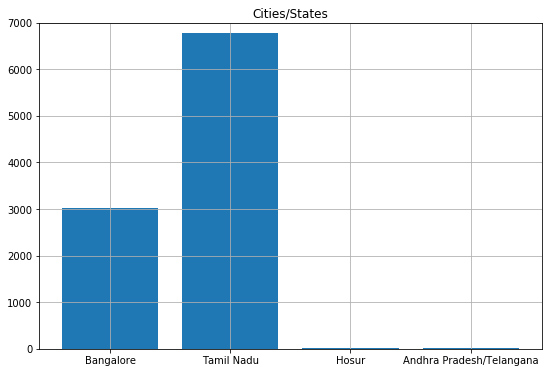

In [104]:
plt.figure(figsize = (9,6))
plt.ylim(0,7000)
plt.title("Cities/States")
plt.grid(True)
plt.bar(['Bangalore','Tamil Nadu','Hosur','Andhra Pradesh/Telangana'],[city_number.count(1),city_number.count(2),city_number.count(3),city_number.count(4)])

In [70]:
c_count = 0
for i in df.location:
    if pd.isna(i):
            c_count+=1
print("Count : ",c_count)

Count :  730


In [106]:
def new_title():
    new_title_id = []
    i = 0
    for name in df.title:
        if name in ['Garbage', 'Garbage Dumping In Vacant Lot/Land', 'Implementation Of Waste Segregation/Garbage', 'Clearance Of Garbage Dump Or Black Spot', 'Clearing Of Roadside Dustbin', 'Collection Of Door-to-door Garbage', 'BPAC – Black Spot']:
            new_title_id.insert(i, 'Waste/Garbage')
        elif name in ['Air Pollution']:
            new_title_id.insert(i, 'Air')
        elif name in ['Maintenance/Repair Of Streetlights', 'Dangling Or Hanging Of OFCs/Cables/Wires', 'Removal Of Illegal Posters And Hoardings']:
            new_title_id.insert(i, 'Streetlights')
        elif name in ['Regular Supply Of Electricity']:
            new_title_id.insert(i, 'Electricity')
        elif name in ['Maintenance And Repair Of Manholes', 'Fixing/Reparing Potholes']:
            new_title_id.insert(i, 'Potholes')
        elif name in ['Traffic Jams/Congestion Or Bottlenecks','Wrong Parking', 'Wrong parking', 'Parking On Footpath']:
            new_title_id.insert(i, 'Traffic/Parking')
        elif name in ['Provide Sewage lines', 'Maintenance And Repair Of Sewage Lines']:
            new_title_id.insert(i, 'Sewage')
        elif name in ['Stop Water Leakage', 'Flooding/Waterlogging Of Roads And Footpaths','Maintenance Of Lake Surrounding']:
            new_title_id.insert(i, 'Water')
        elif name in ['Single Use plastic generator']:
            new_title_id.insert(i, 'Plastic')
        else:
            new_title_id.insert(i, 'Other')
        i = i+1
    df['new_title_id'] = new_title_id
new_title()
df.count()

id                10723
createdAt         10723
updateAt          10723
userId            10723
title             10723
category          10723
description       10723
latitude          10723
longitude         10723
landmark          10318
location           9993
ward_id           10698
ward_title         9234
civic_agency       4667
jg_category_id    10723
jg_category       10723
status_id         10723
city_id           10719
city_number       10723
new_title_id      10723
dtype: int64

{6: 6129, 1: 333, 2: 1178, 5: 662, 7: 1548, 4: 193, 9: 680}


([<matplotlib.patches.Wedge at 0x2187c8c2828>,
 [Text(-0.24526668961402678, 1.0723079086558007, '6'),
  Text(-0.9393368107506592, -0.5724040146337028, '1'),
  Text(-0.6035870969350359, -0.9196100349678312, '2'),
  Text(-0.045910922685439975, -1.0990414856492778, '5'),
  Text(0.6262984879178949, -0.9042954185617433, '7'),
  Text(0.9880903022759902, -0.4834020630367052, '4'),
  Text(1.078242385745051, -0.21770015522001965, '9')],
 [Text(-0.13378183069856003, 0.584895222903164, '57.16'),
  Text(-0.5123655331367232, -0.3122203716183833, '3.11'),
  Text(-0.32922932560092866, -0.5016054736188169, '10.99'),
  Text(-0.02504232146478544, -0.599477173990515, '6.17'),
  Text(0.34161735704612445, -0.49325204648822357, '14.44'),
  Text(0.5389583466959945, -0.26367385256547554, '1.80'),
  Text(0.5881322104063914, -0.11874553921091979, '6.34')])

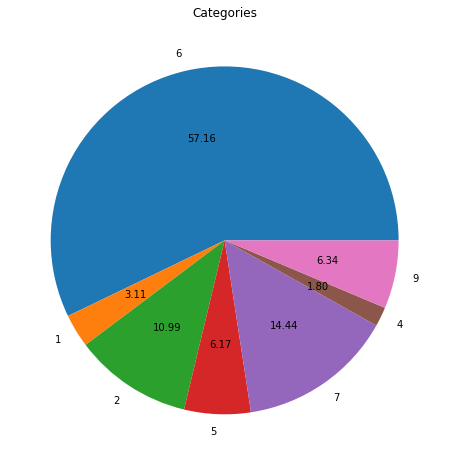

In [72]:
cat = {}
for i in df.category.unique():
    cat[i] = 0

for i in df.category:
    cat[i] +=1

print(cat)
plt.figure(figsize = (8,8))
plt.title("Categories")
plt.pie(cat.values(),labels = cat.keys(),autopct = '%.2f')

{'Waste/Garbage': 5869, 'Air': 333, 'Streetlights': 812, 'Traffic/Parking': 662, 'Sewage': 451, 'Potholes': 1257, 'Electricity': 4, 'Water': 1077, 'Plastic': 258}


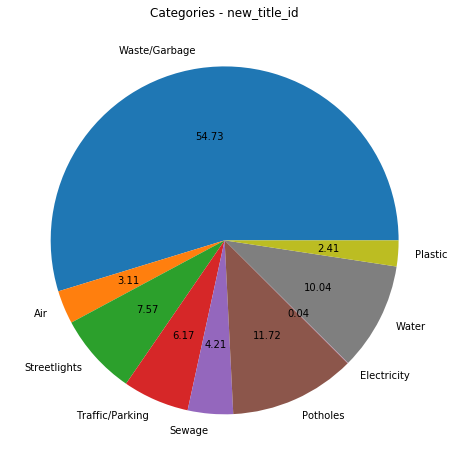

In [108]:
def bar_new_cat():
    new_cat = {}
    for i in df.new_title_id:
        if i not in new_cat:
            new_cat[i] = 1
        else:
            new_cat[i]+=1
    plt.figure(figsize = (8,8))
    plt.title("Categories - new_title_id")
    #plt.grid(True)
    print(new_cat)
    plt.pie(new_cat.values(),labels = new_cat.keys(),  autopct = '%.2f')# color = ['green','red'], tick_label = df.new_title_id.unique())

bar_new_cat()

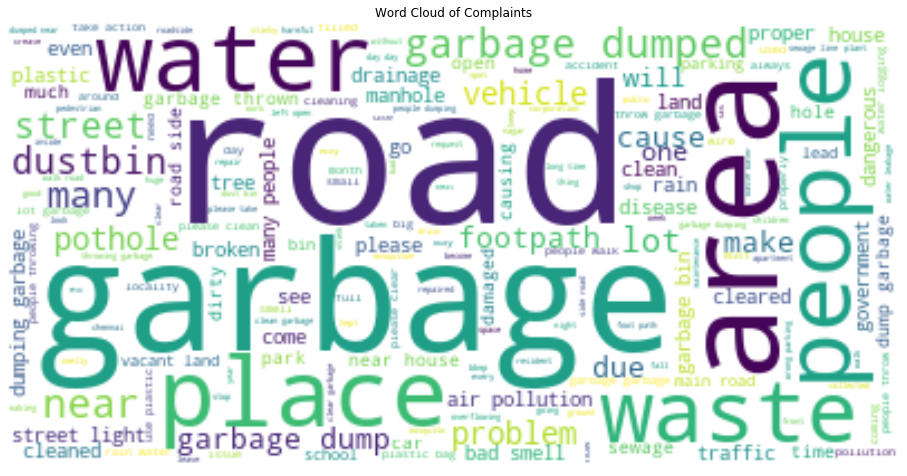

In [74]:
def word_cloud(df):
    df['description'] = df['description'].str.lower()
    des = df.description.str.split(' ')
    #des.head()
    des_cleaned = []

    #removing punctuation
    for text in des:
        text = [x.strip(string.punctuation) for x in text]
        des_cleaned.append(text)

    #des_cleaned[0]

    #joining all the text
    text_des = [" ".join(text) for text in des_cleaned]
    fin_text = " ".join(text_des)
    #final_text_spam[:500]
    wordcloud_spam = WordCloud(background_color="white").generate(fin_text)

    # Lines 2 - 5
    plt.figure(figsize = (16,16))
    plt.title("Word Cloud of Complaints")
    plt.imshow(wordcloud_spam, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
word_cloud(df)

In [111]:
#ward cleaning done only for Bangalore data

k = 0
count = 0
count2 = 0
for i in df.city_number:
    if i == 1:
        if "gandhi bazaar" in str(df.location[k]).lower():
            df.ward_id[k] = 142
        if "2nd Phase, J. P. Nagar" in str(df.location[k]): 
            df.ward_id[k] = 177
        if "1st Phase, J. P. Nagar" in str(df.location[k]): 
            df.ward_id[k] = 177
        if "4th ‘T’ Block,Jayanagar" in str(df.location[k]):
            df.ward_id[k] = 168
        if "4th T Block East" in str(df.location[k]):
            df.ward_id[k] = 168
        if "Hullahalli" in str(df.location[k]):
            df.ward_id[k] = 192
        if "4th Block, Jayanagar" in str(df.location[k]):
            df.ward_id[k] = 168
        if "560004" in str(df.location[k]):
            df.ward_id[k] = 142
        if "Subramanyapura" in str(df.location[k]):
            df.ward_id[k] = 184
        if "BTM Layout" in str(df.location[k]):
            #print(df.location[k], df.ward_id[k])
            df.ward_id[k] = 188
        if "Shanthala Nagar" in str(df.location[k]):
            df.ward_id[k] = 111
        if "High Grounds" in str(df.location[k]):
            df.ward_id[k] = 93
        if "560062" in str(df.location[k]):
            df.ward_id[k] = 196
        if "Electronic City" in str(df.location[k]):
            df.ward_id[k] = 192
        if "Cheemasandra" in str(df.location[k]) or "Budigere Rd" in str(df.location[k]):
            df.ward_id[k] = 54
        if "1st Stage, Kumaraswamy Layout" in str(df.location[k]):
            df.ward_id[k] = 181
        if "Kannamangala" in str(df.location[k]):
            df.ward_id[k] = 83
        if "Pipelineroadvijayanagarbangalore560023" in str(df.location[k]):
            df.ward_id[k] = 124
        if "Doddakannelli" in str(df.location[k]):
            df.ward_id[k]= 150
            
        if "BTM 2nd Stage" in str(df.location[k]):
            df.ward_id[k] = 188
        if "Seegehalli" in str(df.location[k]):
            df.ward_id[k] = 83
        if "Indiranagar" in str(df.location[k]):
            df.ward_id[k] = 80
        if "Kengeri Satellite Town, Bengaluru" in str(df.location[k]):
            df.ward_id[k] = 159
        if "Armane Nagar" in str(df.location[k]):
            df.ward_id[k] = 35
        if "RT Nagar" in str(df.location[k]):
            df.ward_id[k] = 33
        if "Chamundi Nagar" in str(df.location[k]):
            df.ward_id[k] = 21
        if "Ganganagar" in str(df.location[k]):
            df.ward_id[k] = 21
        if "Bairasandra Main Rd" in str(df.location[k]):
            df.ward_id[k] = 58
        if "RR Nagar" in str(df.location[k]):
            df.ward_id[k] = 160
        if "Avalahalli" in str(df.location[k]):
            df.ward_id[k] = 158
        if "HSR Layout" in str(df.location[k]):
            df.ward_id[k] = 174
        if "Hoskote Rd" in str(df.location[k]):
            df.ward_id[k] = 83
        if "MET Layout" in str(df.location[k]):
            df.ward_id[k] = 18
        if "Aavalahalli" in str(df.location[k]):
            df.ward_id[k] = 158
        if "Kempapura" in str(df.location[k]):
            df.ward_id[k] = 7
        if "Arekere" in str(df.location[k]):
            df.ward_id[k] = 193
        if "Nagavara" in str(df.location[k]):
            df.ward_id[k] = 6
        if "560077" in str(df.location[k]):
            df.ward_id[k] = 6
        if "Krishnarajapura" in str(df.location[k]):
            df.ward_id[k] = 6
        if "Nagondanahalli" in str(df.location[k]):
            df.ward_id[k] = 84
        if "Gollarahatti" in str(df.location[k]):
            df.ward_id[k] = 130  
            
   
        #doubtful of vakil
        if "Vakil Garden" in str(df.location[k]):
            df.ward_id[k] = 198
        if "Shobha Hills View Apartment" in str(df.location[k]):
            df.ward_id[k] = 198
        
    k += 1
print(count)

0


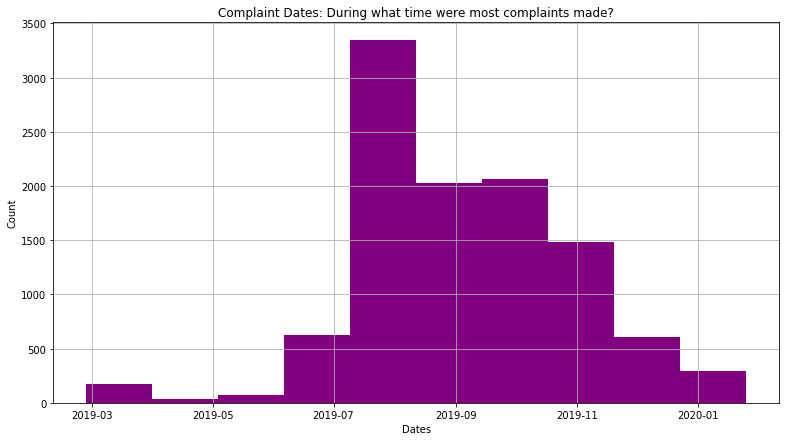

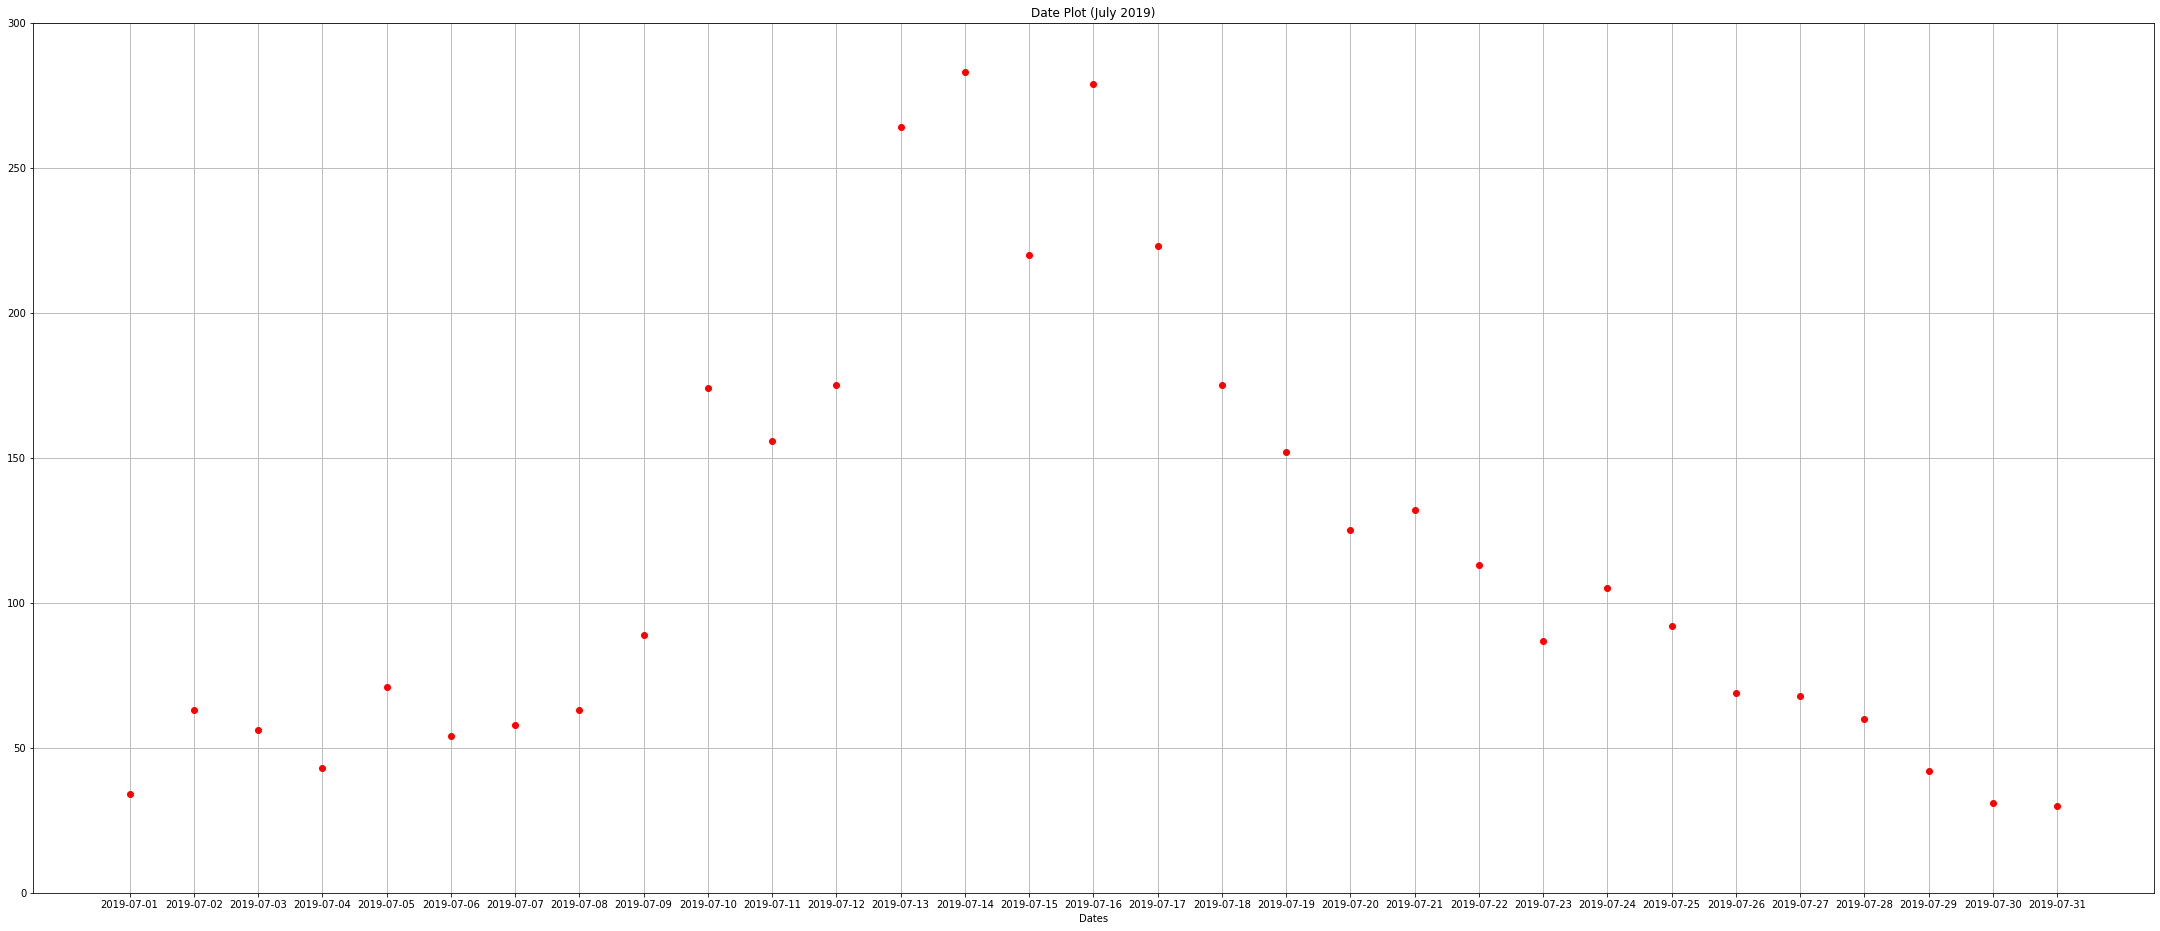

In [75]:
def date_plot():
    df.createdAt = pd.to_datetime(df['createdAt'])
    plt.figure(figsize=(13,7))
    plt.title("Complaint Dates: During what time were most complaints made?")
    plt.xlabel('Dates')
    plt.grid(True)
    plt.ylabel('Count')
    plt.hist(df.createdAt,color='purple')

def date_plot_july():
    dates = []
    for i in df.createdAt:
        d1 = str(i).split(' ')
        d = d1[0].split('-')
        if d[1] == '07':
            dates.append(d1[0])
    date = {}
    for i in dates:
        if i not in date:
            date[i] = 1
        else:
            date[i]+=1
    #print(date['2019-10-02'])
    plt.figure(figsize = (38,16))
    plt.title("Date Plot (July 2019)")
    plt.xlabel("Dates")
    plt.grid(True)
    plt.ylim(0,300)
    plt.plot_date(date.keys(),date.values(),color = 'red')
#plt.hist(dates)

date_plot()
date_plot_july()

In [76]:
print(df.status_id.unique())

[ 3  1 10  2  9  0]


Status ID Key
0: Complaint Submitted
1: Complaint Opened
2: On the Job
3: Resolved 
9: Complaint Reopened 
10: Dormant



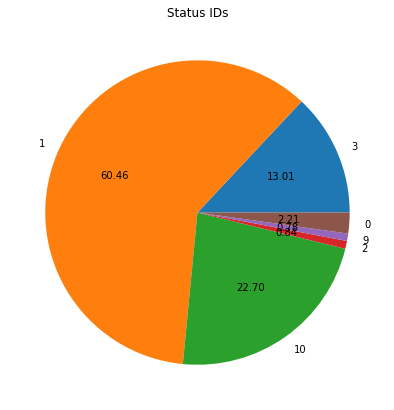

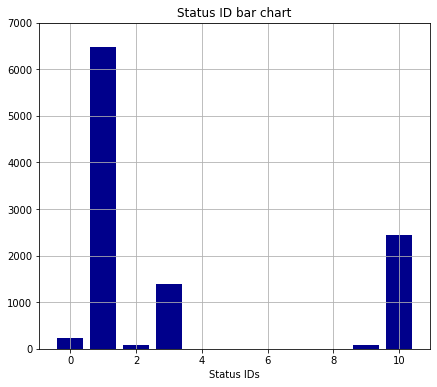

In [118]:
stat = {}
def stat_id_pie(): 
    for i in df.status_id:
        if i not in stat:
            stat[i] = 1
        else:
            stat[i]+=1
    #print(stat)
    plt.figure(figsize = (7,7))
    plt.title("Status IDs")
    plt.pie(stat.values(),labels = stat.keys(),autopct = "%.2f")

def stat_id_bar():
    #print("The status IDs : ",stat)
    plt.figure(figsize = (7,6))
    plt.title("Status ID bar chart")
    plt.grid(True)
    plt.xlabel("Status IDs")
    plt.ylim(0,7000)
    plt.bar(stat.keys(), height=stat.values(), color = 'darkblue')
    
print("Status ID Key\n0: Complaint Submitted\n1: Complaint Opened\n2: On the Job\n3: Resolved \n9: Complaint Reopened \n10: Dormant\n")
stat_id_pie()
stat_id_bar()

{'Waste/Garbage': 1395}


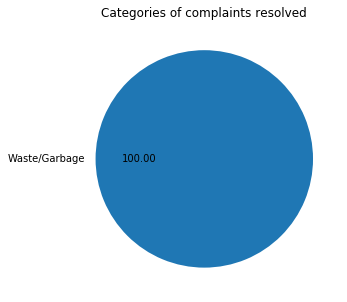

In [78]:
def stat_resolved():
    df1 = df[['new_title_id','status_id']]
    #print(df1)
    #for i in df1.categor
    cat = list(df.new_title_id)
    stat = list(df.status_id)
    res = {}
    for i in stat:
        if i==3:
            ct = cat[stat.index(i)]
            if ct not in res:
                res[ct] = 1
            else:
                res[ct]+=1
    print(res)
    plt.figure(figsize = (5,5))
    plt.title("Categories of complaints resolved")
    plt.pie(res.values(),labels = res.keys(),autopct = '%.2f')
stat_resolved()

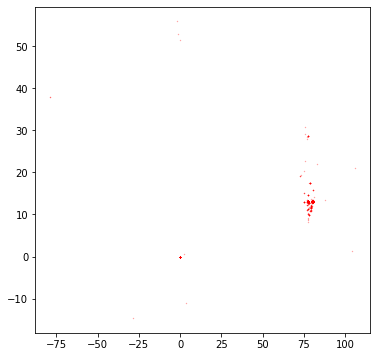

In [79]:
fig, axes = plt.subplots(figsize=(6,6))
axes.scatter(df.longitude, df.latitude, s=0.1, alpha=0.5, c='r')
plt.show()


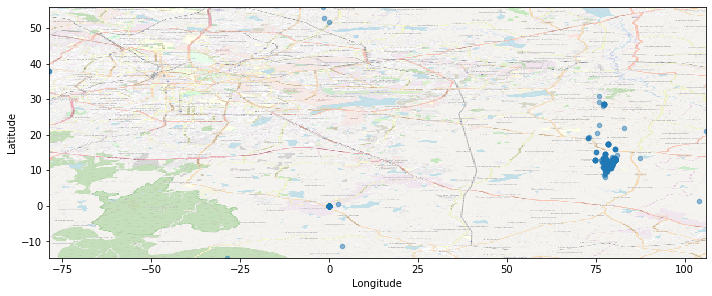

In [80]:
bangalore_map_img = 'https://lh3.googleusercontent.com/np8igtYRrHpe7rvJwMzVhbyUZC4Npgx5fRznofRoLVhP6zcdBW9tfD5bC4FbF2ITctElCtBrOn7VH_qEBZMVoPrTFipBdodufT0QU1NeeQVyokMAKtvSHS9BfYMswXodz_IrkiZStg=w500-h664-no'
bangalore_map = plt.imread(bangalore_map_img)
cmap = plt.get_cmap("jet")

axes = df.plot(figsize=(10,15), kind='scatter', 
                    x='longitude', y='latitude', 
                    alpha=0.5, marker="o", cmap=cmap,
                    colorbar=False)

epsilon = 0.01
bound_box = [min(df.longitude) + epsilon, max(df.longitude) + epsilon, 
             min(df.latitude) + epsilon, max(df.latitude) + epsilon]
im = plt.imshow(bangalore_map, extent=bound_box, zorder=0, 
           cmap=cmap, interpolation='nearest', alpha=0.7)
'''
axes.set_ylabel("Latitude")
axes.set_xlabel("Longitude")
axes.set_title('Accident Heatmap of city of Bangalore')
# Colorbar
speed = train_data["speed"].values
tick_values = np.linspace(speed.min(), speed.max(), num=6, dtype=np.int64)

cbar = plt.colorbar(im, fraction=0.05, pad=0.02)
cbar.set_label("Speed (km / hour)")
cbar.ax.set_yticklabels(["%d"%(val) for val in tick_values])

plt.tight_layout()

#output_image = os.path.join(input_data_dir, "output_bangalore_map_traffic")
#plt.savefig(output_image + ".png", format='png', dpi=300)'''

axes.set_ylabel("Latitude")
axes.set_xlabel("Longitude")

plt.tight_layout()

plt.show()

In [81]:
print(min(abs(df.latitude)))

0.0


In [82]:
count = 0
for i in df.latitude:
    if int(i)==0:
        count+=1
print(count)

460


In [83]:
df_dict = df.to_dict()
#df_dict
count = 0
for j in range(len(df['id'])):
    if int(df_dict['latitude'][j])==0 and int(df_dict['longitude'][j])==0:
        count+=1
print(count)

459


In [84]:
#hdsf

Categories
Waste/Garbage : 1695
Air : 54
Streetlights : 211
Traffic/Parking : 123
Sewage : 116
Potholes : 405
Electricity : 3
Water : 224
Plastic : 129


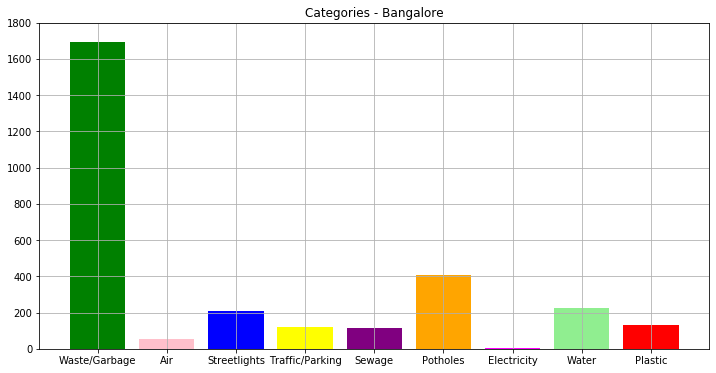

In [133]:
df_b = df[df['city_number']==1]

def cat_b():
    new_cat = {}
    for i in df_b.new_title_id:
        if i not in new_cat:
            new_cat[i] = 1
        else:
            new_cat[i]+=1
    plt.figure(figsize = (12,6))
    plt.title("Categories - Bangalore")
    #plt.grid(True)
    print("Categories")
    for i in new_cat:
        print(i,":",new_cat[i])
    plt.ylim(0,1800)
    plt.grid(True)
    plt.bar(new_cat.keys(),new_cat.values(),color = ['green','pink','blue','yellow','purple','orange','magenta','lightgreen','red'])# color = ['green','red'], tick_label = df.new_title_id.unique())

cat_b() 

In [134]:
def ward_cleaning():
    count = 0
    noise = []
    for i in df_b.ward_id:
        if i not in list(range(1,199)):
            count+=1
            noise.append(i)
    print(count)
    loc = []
    for i in np.unique(np.array(noise)):
        loc.append((df_b.loc[df['ward_id']==i]).location)
    print(loc)
    
ward_cleaning()


1
[60    bangalore
Name: location, dtype: object]


In [87]:
#df['description'].isnull().sum()

In [88]:
#print(df_b.shape)

In [89]:
df_w.head(10)

,Ward_No,Ward_Name,LS_const
0,1,Kempegowda,Chikballapur
1,2,Chowdeshwari,Chikballapur
2,3,Attur,Chikballapur
3,4,Yelahanka Satellite Town,Chikballapur
4,5,Jakkur,Bangalore North
5,6,Thanisandra,Bangalore North
6,7,Byatarayanapura,Bangalore North
7,8,Kodigehalli,Bangalore North
8,9,Vidyaranyapura,Bangalore North
9,10,Doddabommasandra,Bangalore North


In [90]:
#df.count()


The following cells of code depict a machine learning model that uses NLP to filter and preprocess the text data given in df.description, using df.new_title_id as the target values.
Uses NLTK, RE, SKLEARN libraries

pip install -U scikit-learn HAS to be done before running the below snippets of code

In [138]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

stemmer = PorterStemmer()
words = stopwords.words("english")

#the preprocessing is done in 4 steps:

#removing punctuation
#removing stopwords like 'the', 'this','as',etc
#conversion of the entire text to lower case
#Stemming: reducing the number of inflectional forms of words by reducing all to their common stem.
#For example, 'argue','arguing','argued' are all reduced to 'argu'
df['processedtext'] = df['description'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [139]:
df1 = df[['description','processedtext']]
df1.head(10)

,description,processedtext
0,Garbage behind the temple,garbag behind templ
1,Air pollution,air pollut
2,Air pollution in hebbal,air pollut hebbal
3,Garbage is dumped near BES,garbag dump near be
4,Leaf and garbage burning on Shakthi Ganapathi ...,leaf garbag burn shakthi ganapathi templ premi...
5,There is a lot of garbage dump in and around t...,there lot garbag dump around area lot small pe...
6,Replace broken streetlight. Complaint #5 about...,replac broken streetlight complaint
7,Red Matiz parked on the footpath for more than...,red matiz park footpath month no action polic ...
8,Cars have been using the footpath as a parking...,car use footpath park space everyday year no p...
9,Congestion everyday and at all times due to im...,congest everyday time due improp road construct


In [93]:
#grouping data into test and train based on specific target values, in this case new_title_id
target = df['new_title_id']

X_train, X_test, y_train, y_test = train_test_split(df['processedtext'], target, test_size=0.2, random_state=100)

print(df.shape); print(X_train.shape); print(X_test.shape)

(10723, 21)
(8578,)
(2145,)


In [94]:
#Vectorizing the train and test data using TfIDf vectorization
#TfIdf - Text Frequency Inverse Document Freqeuncy : vectorizes based on frequency across the current text document but less frequency across multiple documents

vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7) #initializing the vector
train_tfIdf = vectorizer_tfidf.fit_transform(X_train.values.astype('U')) #astype('U') converts the dataframe into a Unicode array
test_tfIdf = vectorizer_tfidf.transform(X_test.values.astype('U'))#transforming the text into frequency vectors

print(vectorizer_tfidf.get_feature_names()[:10])

['aa', 'aal', 'abandon', 'abcdefghiksdnfglfa', 'abhiramapuram', 'abhiyan', 'abiv', 'abl', 'abolish', 'abrupt']


In [140]:
#building text classification model using Naive Bayes Classifier (most common one which is based on probability)

nb_classifier = MultinomialNB() #classifier created
nb_classifier.fit(train_tfIdf, y_train) #fitting the classifier onto the training data
pred2 = nb_classifier.predict(test_tfIdf) #predictions made on the unseen data
print(pred2[:50])


['Waste/Garbage' 'Waste/Garbage' 'Waste/Garbage' 'Waste/Garbage'
 'Waste/Garbage' 'Waste/Garbage' 'Waste/Garbage' 'Waste/Garbage'
 'Waste/Garbage' 'Waste/Garbage' 'Waste/Garbage' 'Waste/Garbage'
 'Potholes' 'Waste/Garbage' 'Waste/Garbage' 'Waste/Garbage'
 'Waste/Garbage' 'Traffic/Parking' 'Waste/Garbage' 'Waste/Garbage'
 'Waste/Garbage' 'Waste/Garbage' 'Waste/Garbage' 'Waste/Garbage'
 'Waste/Garbage' 'Waste/Garbage' 'Waste/Garbage' 'Waste/Garbage'
 'Waste/Garbage' 'Traffic/Parking' 'Potholes' 'Waste/Garbage'
 'Waste/Garbage' 'Waste/Garbage' 'Waste/Garbage' 'Waste/Garbage'
 'Waste/Garbage' 'Streetlights' 'Waste/Garbage' 'Potholes' 'Waste/Garbage'
 'Water' 'Potholes' 'Waste/Garbage' 'Waste/Garbage' 'Potholes'
 'Waste/Garbage' 'Waste/Garbage' 'Waste/Garbage' 'Waste/Garbage']


In [96]:
#calculating accuracy of the model
accuracy_tfidf = metrics.accuracy_score(y_test, pred2)
print(accuracy_tfidf)

0.7296037296037297


In [110]:
def sentiment():
    sentiment = []
    text = []
   # print(len(df.description))
    for i in df.description:
        text = TextBlob(i)
        sentiment.append([i,text.sentiment])
    #print(len(sentiment))
    #print((sentiment[:10])[1][0])
    
    for i in sentiment:
        pol = i[1][0]
        if(pol>0):
            print(i[0],pol)

sentiment()

Garbage is dumped near BES 0.1
Red Matiz parked on the footpath for more than 6 months. No action by police despite repeated requests. 0.15
Garbage including old cars dumped 0.1
Garbage dump. Near electric pole 0.1
There is an unused old car also apart from garbage 0.1
Old car etc dumped 0.1
Filled with garbage 0.4
Garbage dumped the whole stretch 0.2
Site filled with garbage 0.4
Garbage thrown near ssmrv college 0.1
Garbage dump near Jana bank 0.1
Garbage is being dumped near the sbi branch Indra nagar 0.1
High pollution in the araa 0.16
Infront of no parking.. when there is paid parking right next to that 0.14285714285714285
Many potholes along this stretch of road 0.5
Burning garbage near bsnl office 0.1
Garbage truck filled with garbage parked with no driver  0.4
Street light is not working 0.4
There are 2-3 spots near RV college which are on the verge of becoming a dump yard. It should be look immediately and proper bio and recycle bins should be kept here. 0.18333333333333335
The

More poisonous mosquitos are growing 0.5
These causes a huge difficulty for people who are walking through the footpath. This should be cleared as soon as possible.  0.20000000000000004
In velachery 200 feet main road... U can find these sort of overflown garbage everywhere.....  0.16666666666666666
Very stinky 0.2
Damage on road near the drainage 0.1
Not well maintained drainage ,starts overflowing during rains ,need to take action by the government. 0.1
Garbages are dumped here so the smell is stinky and no one come closer to it so pls clean this garbages and it cause odour smell 0.3666666666666667
They are leaving the drainage in vacant lot and it stinks in it many Mosquitos are there and this causes many health problems so pls make a underground sewage system in Ayanambakkam ward 0.13333333333333333
Request to clean 0.3666666666666667
Request to clean 0.3666666666666667
The colony president should be dismissed and new president should be encouraged 0.13636363636363635
Too many plas

Guys collecting garbage is not a problem but collecting all of them in early morning where people leave to their work time this disturbs a lot  0.1
We have many houses in our street but have only 1 dustbin which is so long. So anybody does the work of collection of door to door garbage will be very useful and can make our surroundings clean.. 0.24133333333333334
Very stinky 0.2
Rainwater is not used properly. There is so much of rainwater being wasted on the roads.we can take some steps to make use of it more wisely. I believe this would at least reduce some amount of scarci 0.15
No water flow so we must clean it 0.3666666666666667
Most dangerous during rainy days when walkers are pushed almost to the centre of a main road 0.022222222222222227
Collect the garbage in roadside bin because this is full so pls put another bin for use 0.35
Cars parked near transformer 0.1
Very stinky 0.2
The wastes that are burnt on bhogi festival causes great amount of pollutants in the air. This leads to 

So what if it is at the corner of the road?? Shouldn't we clean it?? 0.3666666666666667
Street light not working 0.4
Street light not working 0.4
The main problem which still continues is that we don't even have 2 dustbins and people are unwilling to keep the garbage in their bags. Separation while throwing is step 2. 0.16666666666666666
The mini truck has been forgotten 1st main road, HB colony, velachery, for a long time, causing traffic snarls and travelling road uses repeated complaints to authority have been in vain 0.05833333333333333
This is a legal grocery shop operate city impunity on footpath along 4th main road, gandhinagar,  near the gandhinagar club 0.15555555555555556
This creates more  conjugated or disturbs the people living near it. 0.3
Please follow the rules and be a right citizen 0.2857142857142857
The dustbin is overflowing and garbage is thrown outside the bin. This bin is located near a temple. It is emitting a foul smell and causing inconvenience to the people. 

Clear it up.. 0.10000000000000002
Prevent water leakage to have a healthy and wealthy generation..everything is based on water..water is our life..no organism can exist without water..Stop the wastage of water,have a bright future!!!! 0.42500000000000004
Mugappair West bus stand main gate on Bharathi Salai is closed and people make use of it as parking lot. 0.033333333333333326
This garbage has been lying here for a long since. The major problem is that the whole street has garbage lying here n there 0.07083333333333335
The light is not working 
 0.4
Clean this
 0.3666666666666667
See this how it happen it overflows. In this house there is a small baby 2 years . Around that house 

full of  mosquitoes and the baby also suffered from asthma  0.04999999999999999
We should not for the vehicles on the road it will be disturbance for many vehicles that pass through the road and the members who walk on the road we should prevent that vehicles for parking  0.5
The garbage has blocked the whol

 clean the water of guava if possible.  0.12222222222222223
Too much of traffic were the white topping is being done . So all the people have now started to park all their vehicles on the footpath  0.1
There is no proper streetlights near vidyaranyapuram road. 0.05
There is a huge ground outside my apt where BBMP dumps garbage even though it isn’t a landfill. Previous attempts at getting them to clear it off by the apartments owners association have failed. 0.07222222222222223
Near my a lot of house lot of Garbage dumps are being collected and not at all segregating it and are stored near the houses and causes many diseases and produce a lot of mosquitos ......

 0.2333333333333333
Please clean this garbage mosquitoes are coming 0.3666666666666667
Please clean this garbage mosquitoes are coming 0.3666666666666667
Please clean this garbage mosquitoes are coming 0.3666666666666667
To clean the garbage now
 0.3666666666666667
Thrown beside main road 0.16666666666666666
Dumped near road 0.